In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# prevent "kernel died" error because of matplotlib:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
torch.manual_seed(1)
np.random.seed(1)

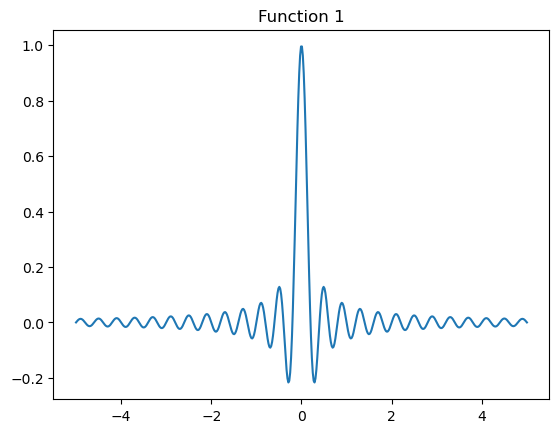

In [3]:
# input function
x = torch.linspace(-5,5,500)
x = torch.unsqueeze(x,dim=1)
y = (np.sin(5*np.pi*x))/5/np.pi/x

x = x.clone().detach()
y = y.clone().detach()

plt.plot(x, y)
plt.title('Function 1')
plt.show()

In [4]:
# models
class model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(1,5),
                nn.ReLU(),
                nn.Linear(5,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,1)
        )
        self.loss_fnc = nn.MSELoss()

    def forward(self, x):
        return self.layers(x)

In [5]:
def train_fnc(model, x, y, n_epoch):
    optim = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-4)
    epochs = []; epoch_err = []; grad_err=[]
    for ep in range(n_epoch):
        epochs.append(ep)
        y_pred = model(x)
        loss = model.loss_fnc(y_pred, y)
        loss.backward()
        epoch_err.append(loss.detach().numpy())
        optim.step()
        
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_err.append(grad_norm)
        
        optim.zero_grad()
        
        if ep%500==0:
            print('Epoch #: {}, Loss = {}'.format(ep,loss.detach().numpy()))
    return y_pred, epochs, epoch_err, grad_err

In [6]:
def run_model(model, x, y, n_epoch=20_000):
    morel_pred, model_ep, model_err, grad_err = train_fnc(model, x, y, n_epoch)
    return morel_pred, model_ep, model_err, grad_err

Epoch #: 0, Loss = 0.10713589936494827
Epoch #: 500, Loss = 0.01947423256933689
Epoch #: 1000, Loss = 0.019474271684885025
Epoch #: 1500, Loss = 0.019474269822239876
Epoch #: 2000, Loss = 0.019474273547530174
Epoch #: 2500, Loss = 0.019474273547530174
Epoch #: 3000, Loss = 0.019474271684885025
Epoch #: 3500, Loss = 0.019474271684885025
Epoch #: 4000, Loss = 0.019474269822239876
Epoch #: 4500, Loss = 0.019474273547530174
Epoch #: 5000, Loss = 0.019474273547530174
Epoch #: 5500, Loss = 0.019474269822239876
Epoch #: 6000, Loss = 0.019474273547530174
Epoch #: 6500, Loss = 0.019474271684885025
Epoch #: 7000, Loss = 0.019474271684885025
Epoch #: 7500, Loss = 0.019474269822239876
Epoch #: 8000, Loss = 0.019474271684885025
Epoch #: 8500, Loss = 0.019474271684885025
Epoch #: 9000, Loss = 0.019474269822239876
Epoch #: 9500, Loss = 0.019474269822239876
Epoch #: 10000, Loss = 0.019474271684885025
Epoch #: 10500, Loss = 0.019474269822239876
Epoch #: 11000, Loss = 0.019474269822239876
Epoch #: 11500

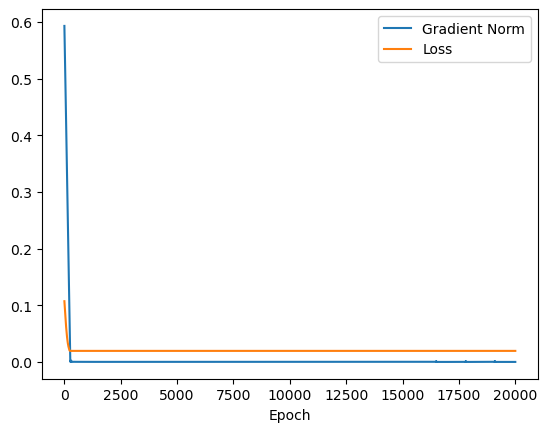

In [7]:
if __name__=='__main__':
    m_pred, m_ep, m_ep_err, grad_err = run_model(model1(), x, y)
    plt.plot(grad_err,label='Gradient Norm')
    plt.plot(m_ep_err,label='Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()